# Dense Neural Network (DNN)

## Import the librairies

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Retrieve data

In [2]:
# Load data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # many data set are included in keras

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


## Data Normalization

In [3]:
xmax=x_train.max()
print (xmax)
x_train = x_train / xmax
x_test  = x_test  / xmax

255


## Create the model

In [4]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


keras.layers.Dense( hidden1, activation='relu', name='Layer1') means
a dense neural layer with 100 perceptron, activation functions is relu
the number of parameters is (28x28+1)*100: '100' the number of perceptron, '28x28' the size of the input and '1' for the bias

## Train the model

In [5]:
batch_size  = 32
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = 1,
                      validation_data = (x_test, y_test))

Epoch 1/16
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2506 - accuracy: 0.9272 - val_loss: 0.1288 - val_accuracy: 0.9588
Epoch 2/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1060 - accuracy: 0.9675 - val_loss: 0.0914 - val_accuracy: 0.9720
Epoch 3/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0738 - accuracy: 0.9775 - val_loss: 0.0830 - val_accuracy: 0.9729
Epoch 4/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0578 - accuracy: 0.9815 - val_loss: 0.0850 - val_accuracy: 0.9759
Epoch 5/16
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0863 - val_accuracy: 0.9731
Epoch 6/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0370 - accuracy: 0.9875 - val_loss: 0.0846 - val_accuracy: 0.9753
Epoch 7/16
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0771 - val_accuracy:

epoch is when the entire dataset is passed forward and backward through the network.
batch size is the total number of training examples present in a single batch
iterations is the number of batches needed to complete one epochs 
iterations=dataset size/batch size

## Evaluate the model

In [6]:
 score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.10632309317588806
Test accuracy : 0.9801999926567078


## Plot history

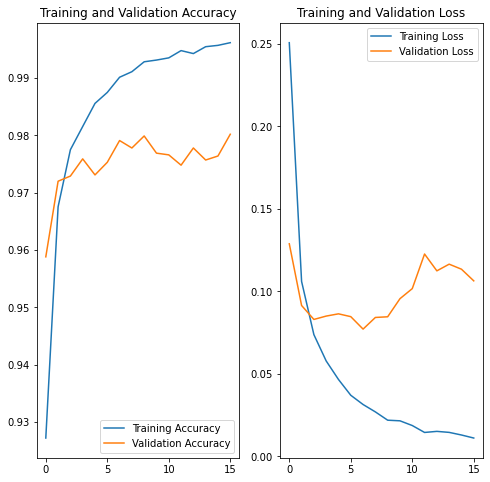

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Plot the results

313/313 [==============================] - 1s 2ms/step
tf.Tensor(
[[ 970    1    0    0    0    1    3    0    2    3]
 [   0 1125    2    0    0    1    2    1    4    0]
 [   2    0 1015    2    1    0    2    4    6    0]
 [   0    0    4  980    0   11    0    3    6    6]
 [   0    0    1    0  956    1    8    4    3    9]
 [   2    0    0    3    0  875    2    1    6    3]
 [   3    1    2    0    3    8  934    0    7    0]
 [   1    1    6    3    3    0    0 1007    4    3]
 [   1    0    2    2    1    2    0    3  960    3]
 [   1    2    0    2    7    4    1    4    8  980]], shape=(10, 10), dtype=int32)


<AxesSubplot:>

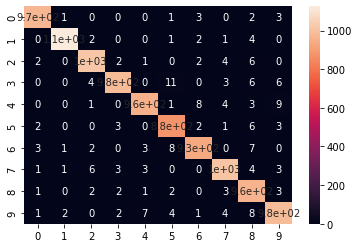

In [8]:
y_sigmoid = model.predict(x_test)
y_pred    = np.argmax(y_sigmoid, axis=-1)

cf_matrix=tf.math.confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)

## Plot some errors

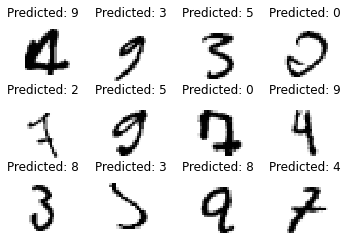

In [18]:
images = x_test.reshape((-1, 28, 28))

# poorly predicted data are recovered 
misclass = (y_test != y_pred)
misclass_images = images[misclass,:,:]
misclass_predicted = y_pred[misclass]

# a sample of these images is selected
select = np.random.randint(misclass_images.shape[0], size=12)

# the images and the (erroneous) predictions associated with these images are displayed
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]))
plt.show()